<a href="https://colab.research.google.com/github/Vineela-Kandru/ML_Homework_Projects/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Create a regression model for predicting housing prices column 'median_house_value'**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

**Fetching and Loading the Dataset**

In [ ]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

In [ ]:
df = pd.read_csv(url)

**EDA**

**Look at the median_house_value variable. Does it have a long tail? NO**

<Axes: xlabel='median_house_value', ylabel='Count'>

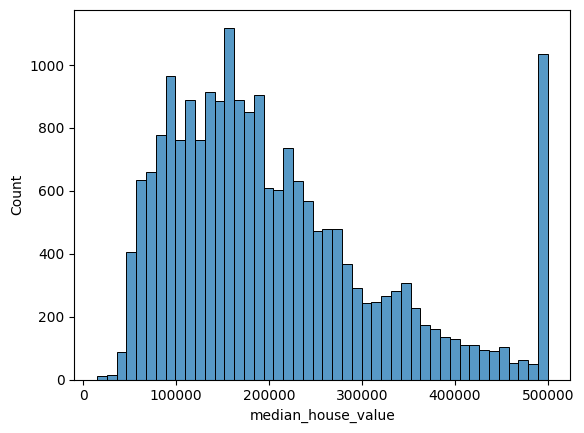

In [ ]:
#Plotting the histogram

sns.histplot(df.median_house_value)

**Preparing the dataset**

For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [ ]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [ ]:
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

In [ ]:
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

**QUESTION 1**

There's one feature with missing values. What is it?

In [ ]:
missing_values_feature = df.isnull().sum()

print('Feature with missing Values:', missing_values_feature[missing_values_feature > 0].index.tolist())

Feature with missing Values: ['total_bedrooms']


**Question 2**

What's the median (50% percentile) for variable 'population'?

In [ ]:
print('median (50% percentile) for variable "population":',df['population'].median())

median (50% percentile) for variable "population": 1195.0


**Prepare and split the dataset**

Shuffle the initial dataset, use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [ ]:
df.shape

(15687, 9)

In [ ]:
#splitting the dataset
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [ ]:
#shuffling the dataset

idx = np.arange(n)

np.random.seed(42)

np.random.shuffle(idx)

idx[n_train:]

array([7493, 9043, 5968, ..., 5390,  860, 7270])

In [ ]:
# Applying the log transformation to the median_house_value variable

median_house_value_log = np.log1p(df.median_house_value)

<Axes: xlabel='median_house_value', ylabel='Count'>

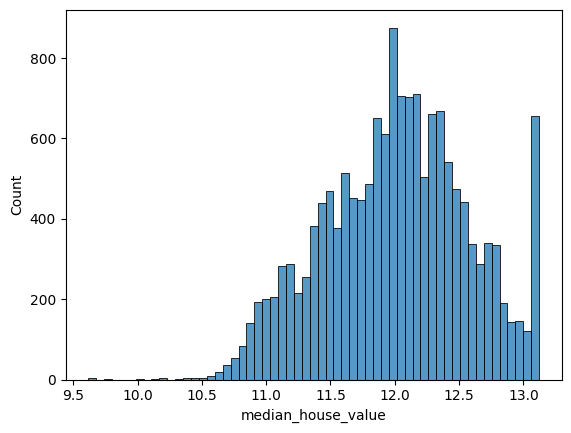

In [ ]:
# plotting
sns.histplot(median_house_value_log)

In [ ]:
# Creating Training, Validation and Test Dataframes.

df_train = df.iloc[idx[n_train:]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train + n_val :]]

In [ ]:
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

In [ ]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

**Question 3**

We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

**Both are equally good.**




In [ ]:
# missing values

df_train.isnull().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        63
population             0
households             0
median_income          0
dtype: int64

**FILLING MISSING VALUES WITH ZERO**

In [ ]:
# Preparing the Feature Matrix - Filled the missed values with 0's

def prepare_X_with_Zeros(df):
  df_num = df
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
#Training the Linear Regression Model

def train_linear_regression(X,y):
  ones =np.ones(X.shape[0])
  X = np.column_stack([ones,X])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)
  return w_full[0], w_full[1:]

In [ ]:
# Calculating the RMSE

def rmse(y,y_pred):
  error = y - y_pred
  se = error**2
  mse = se.mean()
  return np.sqrt(mse)

In [ ]:
#Implementing the functions

X_train = prepare_X_with_Zeros(df_train)
W0,W = train_linear_regression(X_train, y_train)

In [ ]:
#Predicting using validating dataset

X_val = prepare_X_with_Zeros(df_val)
y_pred = W0 + X_val.dot(W)

In [ ]:
# RMSE Calculation

score = rmse(y_val,y_pred)

round(score, 2)

0.34

**FILLING MISSING VALUES WITH THE MEAN IN TRAINING SET**

In [ ]:
# Preparing the Feature Matrix - Filled the missed values with 0's

def prepare_X_with_mean(df):
  df_filled_with_mean = df
  mean_value = df_train['total_bedrooms'].mean()
  df_filled_with_mean = df.fillna(mean_value)
  X = df_filled_with_mean.values
  return X

In [ ]:
# Implementing fnctions

X_train = prepare_X_with_mean(df_train) # feature matrix
W0,W = train_linear_regression(X_train, y_train) # weights

In [ ]:
# Using Validating Dataset

X_val = prepare_X_with_mean(df_val)
y_pred = W0 + X_val.dot(W)

In [ ]:
# Calculating RMSE

score = rmse(y_val,y_pred)

round(score, 2)

0.34

**Question 4**

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

**ANSWER - 0**

In [ ]:
#Training the Linear Regression Model

def train_linear_regression_reg(X,y,r):
  ones =np.ones(X.shape[0])
  X = np.column_stack([ones,X])
  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)
  return w_full[0], w_full[1:]

In [ ]:
# Regularized linear regression

r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  X_train = prepare_X_with_Zeros(df_train)
  W0,W = train_linear_regression_reg(X_train, y_train,r=r)
  X_val = prepare_X_with_Zeros(df_val)
  y_pred = W0+ + X_val.dot(W)
  score = rmse(y_val,y_pred)
  print(r, '-' ,round(score,2) )

0 - 0.34
1e-06 - 0.34
0.0001 - 0.34
0.001 - 0.34
0.01 - 0.34
0.1 - 0.34
1 - 0.35
5 - 0.35
10 - 0.35


**Question 5**

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

**0.004**

In [35]:
# Define the list of seed values
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Initialize a list to store RMSE scores
rmse_scores = []

# Loop through different seed values
for seed in seed_values:
    # Set the random seed for reproducibility
    np.random.seed(seed)

    # Perform train/validation/test split (60%/20%/20%)
    n = len(df)
    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train = n - n_val - n_test
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    y_train = np.log1p(df_train.median_house_value)
    y_val = np.log1p(df_val.median_house_value)

    # Fill missing values with 0
    X_train = prepare_X_with_Zeros(df_train)
    X_val = prepare_X_with_Zeros(df_val)

    # Train a model without regularization
    W0, W = train_linear_regression(X_train, y_train)

    # Predict on the validation set
    y_pred = W0 + X_val.dot(W)

    # Calculate RMSE
    rmse_score = rmse(y_val, y_pred)

    # Append the RMSE score to the list
    rmse_scores.append(rmse_score)

# Calculate the standard deviation of RMSE scores
std_dev = np.std(rmse_scores)

# Round the result to 3 decimal digits
std_dev_rounded = round(std_dev, 3)

# Print the standard deviation
print(f"The standard deviation of RMSE scores is: {std_dev_rounded}")

The standard deviation of RMSE scores is: 0.004


**Question 6**

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

**0.166**

In [44]:
# Set the random seed for reproducibility
np.random.seed(9)

# Perform train/validation/test split (60%/20%/20%)
n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

# Combine train and validation datasets
df_train_val = pd.concat([df_train, df_val])

y_train_val = np.log1p(df_train_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

# Fill missing values with 0
X_train_val = prepare_X_with_Zeros(df_train_val)
X_test = prepare_X_with_Zeros(df_test)

# Train a model with regularization parameter r=0.001
W0, W = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

# Predict on the test set
y_pred = W0 + X_test.dot(W)

# Calculate RMSE on the test dataset
rmse_test = rmse(y_test, y_pred)

print(f"The RMSE on the test dataset is: {rmse_test.round(3)}")


The RMSE on the test dataset is: 0.166
